In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tools
import importlib
from scipy.optimize import curve_fit
import sys
import math
importlib.reload(tools)
import re

In [11]:
importlib.reload(tools)
eps_rho=0.8
eps_norm=0.8
eps_action=eps_norm
rho=3.745091
norm=1
norm_action=norm
size_local=5
neigh=2

#file="profile4dt0c5to_45x6.dat"
file="profile4dt0c5to_64x10.dat"
file="profile4dt0c352to.dat"
file_top="/home/planck/workspace/fractional/Smooth/check_twist/"+file
file_act=file_top
top_density,sizes=tools.read_top(file_top)
density_2d_top,sizes_big,index_smal=tools.projection_2d(top_density,sizes)
#density_2d_act,sizes_big,index_smal=tools.projection_2d(act_density,sizes)
inst, a_inst, frac, a_frac, t_frac, t_inst, total=tools.find_inst_2d(density_2d_top,
                                                                     density_2d_top,sizes_big,norm,2*norm,neigh)

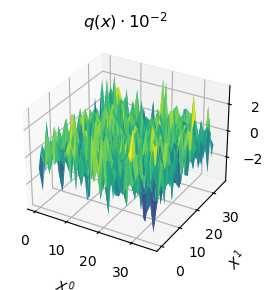

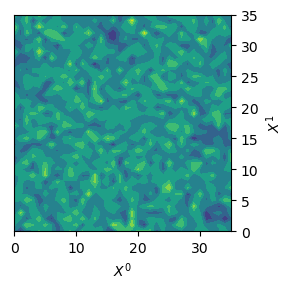

()

In [13]:
importlib.reload(tools)
plt.rcParams.update({'font.size': 10})
for i in range(0,len(frac)):
    if frac[i][2][4]<0.15 and frac[i][2][5]>0.001:
        jj=i
        print(jj)
        ppol=frac[jj][2]
        print(ppol)
        maxy=frac[jj][1]
        #print(np.sqrt(np.diag(frac[i][3])))
tools.plot_dens_2d(file_top,density_2d_top,sizes_big,[],[])

In [5]:
for i in range(0,len(frac)):
    if frac[i][3][4]<0.1:
        jj=i
        print(jj)
        pgaus=frac[jj][3]
        print(pgaus)
        #print(np.sqrt(np.diag(frac[i][3])))
tools.plot_dens_2d(file_top,density_2d_top,sizes_big,[frac[jj]],[])

NameError: name 'jj' is not defined

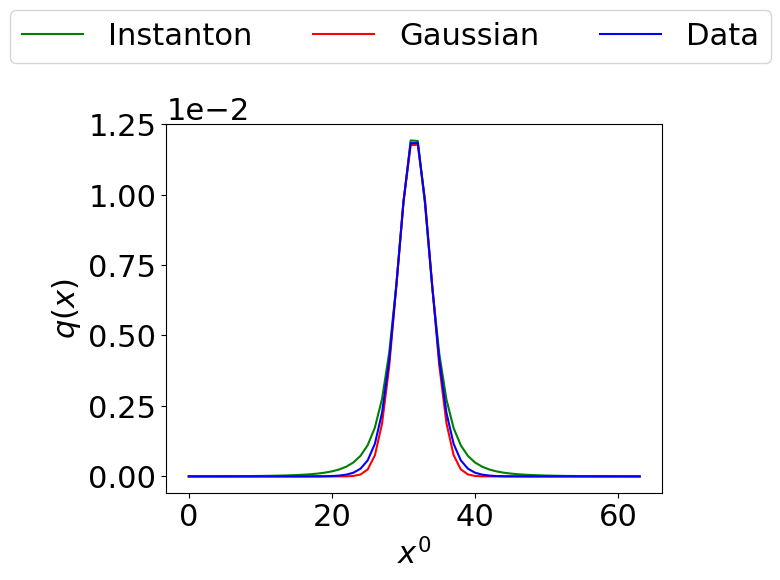

In [73]:
plt.rcParams.update({'font.size': 22})
importlib.reload(tools)

directory="../../fractional/Smooth/tony/"
file="Smooth_64x10_fit.pdf"
tools.plot_fit(density_2d_top,sizes_big,ppol,pgaus,directory,file,maxy)
with open(directory+"fit_64x10.txt","w") as f:
    for element in ppol:
        f.write(str(element)+" ")
    f.write("\n")
    for element in pgaus:
        f.write(str(element)+" ")
    f.write("\n")


In [113]:
def linear(L,a,b):
    return(a*L+b)

def quadr(L,a,b,c):
    return(a*L**2+b*L+c)

In [117]:
L=[]
rho=[]
height=[]
with open("../../fractional/Smooth/tony/fit_pol.txt", "r") as file:
    for line in file:
        line=line.split(" ")
        L.append(int(line[0]))
        rho.append(float(line[3]))
        height.append(float(line[5]))

rho_pol, rho_pcov = curve_fit(linear, L, rho)
height_pol, height_pcov = curve_fit(quadr, L, height)

In [226]:
rho_pol

array([ 0.44703046, -0.24368374])

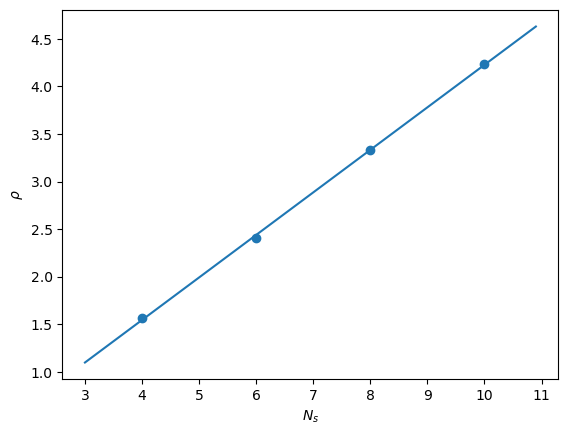

In [225]:
x=np.arange(3,11,0.1)
y=linear(x,rho_pol[0],rho_pol[1])
plt.plot(x,y)
plt.scatter(L,rho)
plt.xlabel("$N_s$")
plt.ylabel("$ \\rho $")
plt.savefig("smooth_rho.pdf",bbox_inches='tight')

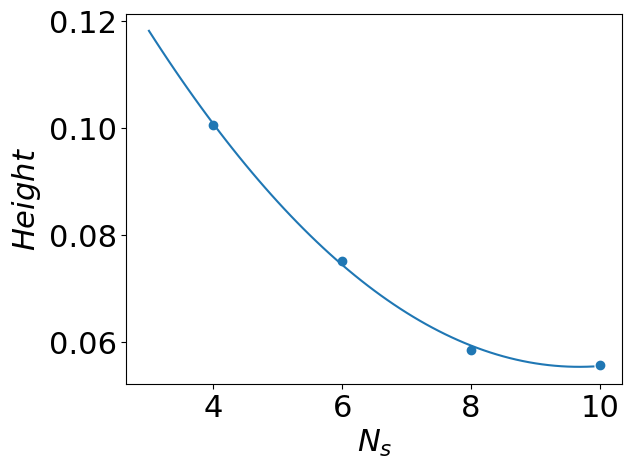

In [141]:
x=np.arange(3,10,0.1)
y=quadr(x,height_pol[0],height_pol[1],height_pol[2])
plt.plot(x,y)
plt.scatter(L,height)
plt.xlabel("$N_s$")
plt.ylabel("$ Height $")
plt.savefig("smooth_height.pdf", bbox_inches='tight')